In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel("owid-covid-data.xlsx")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
#code that filters out European countries
european_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
    'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
    'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
    'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania',
    'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia',
    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'
]

# subset for European countries
europe_data = data[data['location'].isin(european_countries)]
europe_data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
2714,ALB,Europe,Albania,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2715,ALB,Europe,Albania,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2716,ALB,Europe,Albania,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2717,ALB,Europe,Albania,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
2718,ALB,Europe,Albania,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN


In [6]:
# create a table that shows the number of features with more than 30% missing values for each country
def missing_features_by_country(df):

    missingness = df.groupby('location').apply(lambda group: group.isna().mean() * 100)
    
    # Count the number of features with more than 30% missing values for each country
    features_missing_40 = (missingness > 40).sum(axis=1)
    
    # Create a summary DataFrame
    summary = pd.DataFrame({
        'Country': features_missing_40.index,
        'Features with >40% Missingness': features_missing_40.values
    })
    
    return summary.sort_values(by='Features with >40% Missingness', ascending=True)

# Calculate and display the results
missing_features_summary = missing_features_by_country(europe_data)
print(missing_features_summary)

                   Country  Features with >40% Missingness
21                   Italy                               7
6                  Belgium                               9
12                 Estonia                              11
43                   Spain                              14
26               Lithuania                              14
14                  France                              15
11                 Denmark                              16
20                 Ireland                              16
27              Luxembourg                              18
45             Switzerland                              19
17                  Greece                              19
35                  Poland                              21
36                Portugal                              22
16                 Germany                              22
41                Slovakia                              22
13                 Finland                              

In [7]:
# check for overall missingness
missing_values_by_location = europe_data.groupby('location').apply(lambda x: x.isnull().sum())
missing_values_df = pd.DataFrame(missing_values_by_location)
columns_to_exclude = ["iso_code", "continent", "location", "date"]
missing_values_df['sum_missing'] = missing_values_df.drop(columns=columns_to_exclude).sum(axis=1)
missing_total_by_location = missing_values_df[['location', 'sum_missing']]
missing_total_by_location = missing_total_by_location.sort_values(by='sum_missing', ascending=True)
missing_total_by_location.head(20)

,location,sum_missing
location,,
Italy,0,18094
Belgium,0,20668
France,0,21166
Estonia,0,23902
Switzerland,0,25625
Spain,0,25661
Lithuania,0,26176
Luxembourg,0,26640
Ireland,0,27108


In [8]:
# pick countries that have relatively low missingness and that are adjacent 
country_list = [
    'Spain', 'France', 'Germany', 'Ireland', 'United Kingdom',
    'Italy', 'Belgium', 'Netherlands', 'Switzerland', 'Luxembourg'
]
selected_data = europe_data[europe_data['location'].isin(country_list)]
selected_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
28497,BEL,Europe,Belgium,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN
28498,BEL,Europe,Belgium,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN
28499,BEL,Europe,Belgium,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,-151.3,-6.34,-6.34,-13.086293
28500,BEL,Europe,Belgium,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN
28501,BEL,Europe,Belgium,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,31.4,NaN,5.64,81.63,0.931,11655923,NaN,NaN,NaN,NaN


In [9]:
# number of available data from different days
date_count_by_location = selected_data.groupby('location')['date'].nunique()
date_count_by_location_sorted = date_count_by_location.sort_values(ascending=True)
date_count_by_location_sorted

location
Belgium           1357
France            1357
Germany           1357
Ireland           1357
Italy             1357
Luxembourg        1357
Netherlands       1357
Spain             1357
Switzerland       1357
United Kingdom    1357
Name: date, dtype: int64

In [10]:
# check for missingness by country
missing_values_by_location = selected_data.groupby('location').apply(lambda x: x.isnull().sum())
missing_values_df = pd.DataFrame(missing_values_by_location)
missing_values_df.to_csv('missing_values.csv')

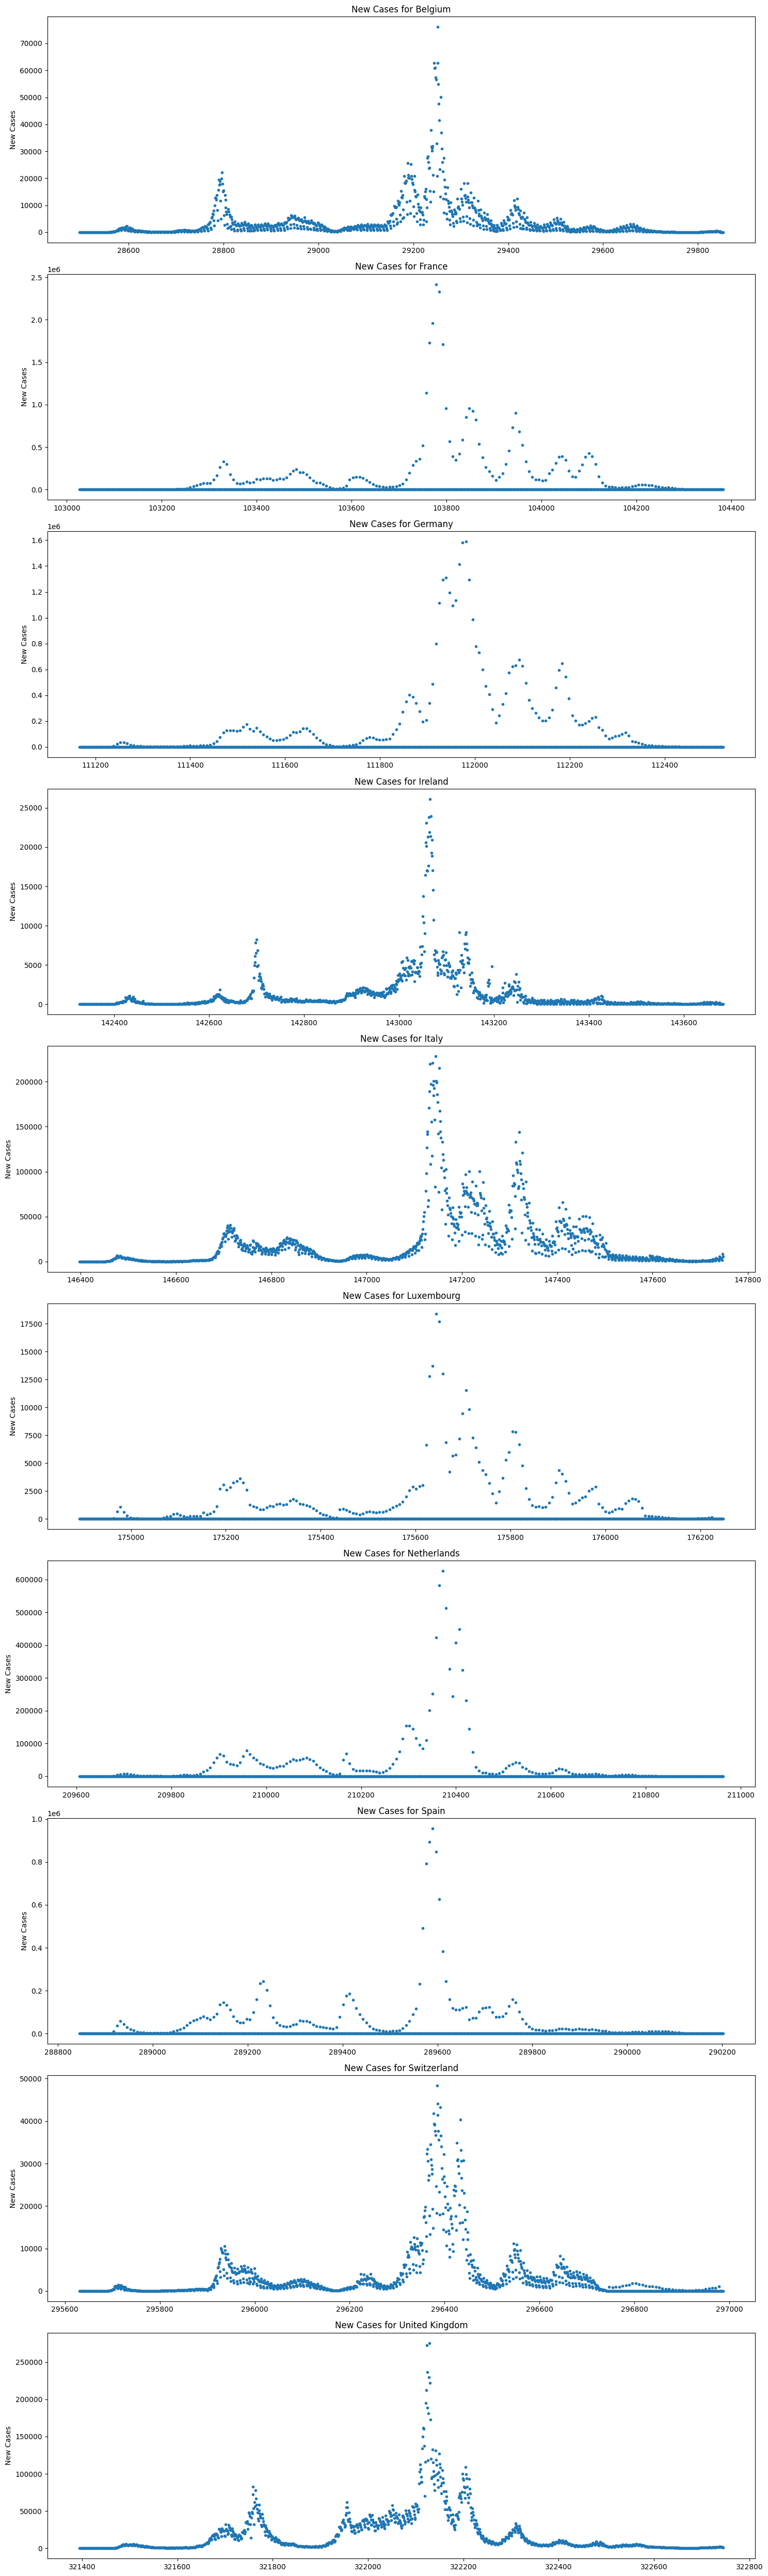

In [11]:
#selected_data['date'] = pd.to_datetime(selected_data['date'])
#selected_data.set_index('date', inplace=True)
#selected_data.sort_index(inplace=True)
locations = selected_data['location'].unique()

plt.figure(figsize=(15, 5 * len(locations)))

for i, location in enumerate(locations, 1):
    plt.subplot(len(locations), 1, i)
    selected_data[selected_data['location'] == location]['new_cases'].plot(style='.', title=f'New Cases for {location}')
    plt.ylabel('New Cases')

plt.tight_layout()
plt.show()

We observed zeros in many different countries; this can be attributed to the fact that some countries report weekly instead of daily. Therefore we decided to use new_cases_smoothed as are target variable. 

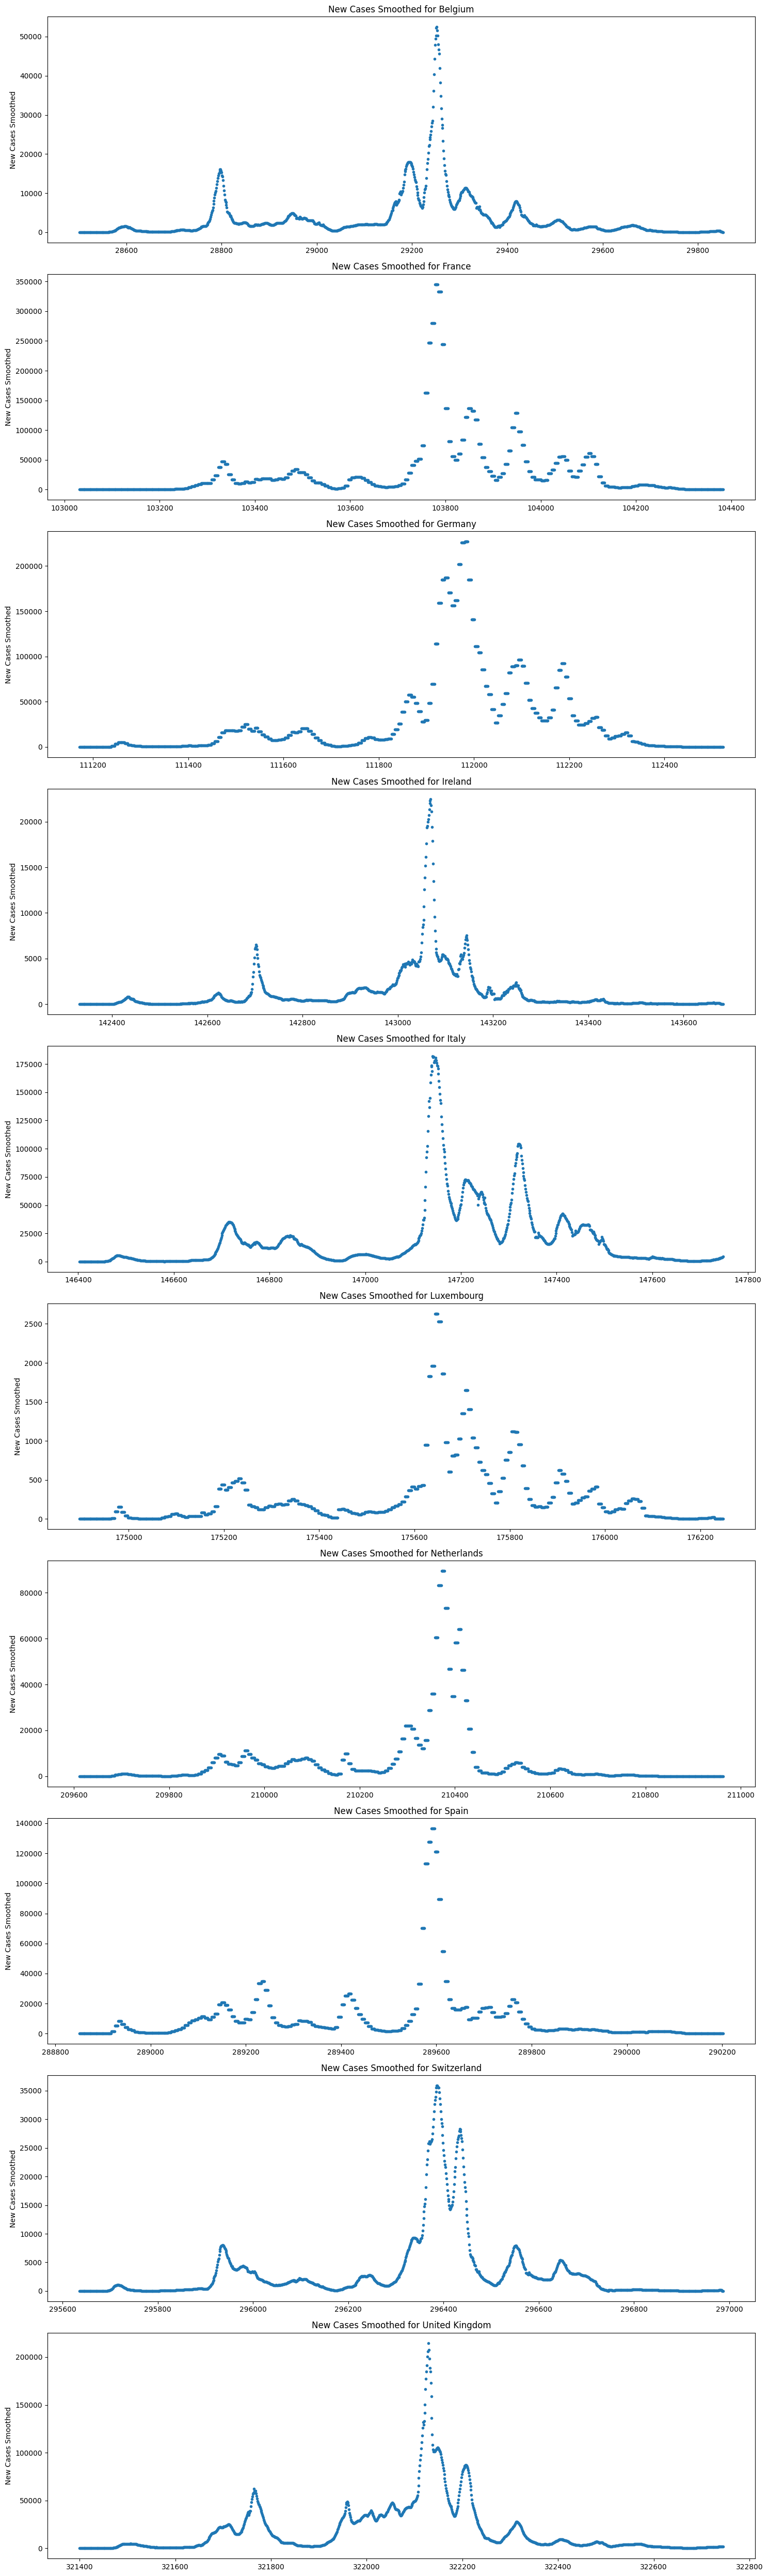

In [12]:
plt.figure(figsize=(15, 5 * len(locations)))

for i, location in enumerate(locations, 1):
    plt.subplot(len(locations), 1, i)
    selected_data[selected_data['location'] == location]['new_cases_smoothed'].plot(style='.', title=f'New Cases Smoothed for {location}')
    plt.ylabel('New Cases Smoothed')

plt.tight_layout()
plt.show()

## Data Cleaning

In [13]:
#data missingness
missing_data = selected_data.isnull().sum()
threshold = 0.4 * len(selected_data)
missing_data = missing_data[missing_data < threshold]
missing_data

iso_code                                         0
continent                                        0
location                                         0
date                                             0
total_cases                                    358
new_cases                                       12
new_cases_smoothed                              62
total_deaths                                   525
new_deaths                                       6
new_deaths_smoothed                             56
total_cases_per_million                        358
new_cases_per_million                           12
new_cases_smoothed_per_million                  62
total_deaths_per_million                       525
new_deaths_per_million                           6
new_deaths_smoothed_per_million                 56
reproduction_rate                             3236
icu_patients                                  3702
icu_patients_per_million                      3702
hosp_patients                  

In [14]:
# drop features with >40% missingness
threshold = 0.6 * len(selected_data)

data_clean = selected_data.dropna(thresh=threshold, axis=1)
data_clean.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_vaccinations_smoothed',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', '

In [28]:
#impute using KNN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

numeric_cols = data_clean.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
data_clean_scaled = data_clean.copy()
data_clean_scaled[numeric_cols] = scaler.fit_transform(data_clean[numeric_cols])


imputer = KNNImputer(n_neighbors=5)
data_clean_scaled[numeric_cols] = imputer.fit_transform(data_clean_scaled[numeric_cols])

data_clean_imputed = data_clean.copy()
data_clean_imputed[numeric_cols] = scaler.inverse_transform(data_clean_scaled[numeric_cols])

missing_values_count = data_clean_imputed.isnull().sum()
missing_values_count[missing_values_count > 0]


Series([], dtype: int64)

In [16]:
# drop multicollinear variables such as new_cases and new_cases_per_million
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_numeric = data_clean_imputed.select_dtypes(include=[np.number])

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = data_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(data_numeric.values, i) for i in range(data_numeric.shape[1])]

vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

/Users/timhong/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                      Variable        VIF
37                                  population        inf
31                         diabetes_prevalence        inf
25                                  median_age        inf
26                               aged_65_older        inf
27                               aged_70_older        inf
28                              gdp_per_capita        inf
24                          population_density        inf
30                       cardiovasc_death_rate        inf
32                              female_smokers        inf
33                                male_smokers        inf
34                  hospital_beds_per_thousand        inf
35                             life_expectancy        inf
36                     human_development_index        inf
15                               hosp_patients  54.635846
3                                 total_deaths  49.116389
16                   hosp_patients_per_million  42.146448
17            

In [17]:
data_vif = data_clean_imputed.copy()
columns_to_drop = ['population', 'diabetes_prevalence', 'aged_65_older',
                   'life_expectancy','total_cases', 'total_deaths_per_million',
                   'new_people_vaccinated_smoothed', 'median_age', 'human_development_index',
                   'male_smokers', 'cardiovasc_death_rate', 'hosp_patients_per_million',
                    'hospital_beds_per_thousand', 'aged_70_older', 'weekly_hosp_admissions_per_million',
                    'icu_patients_per_million','new_deaths_smoothed_per_million', 'new_vaccinations_smoothed_per_million',
                    'female_smokers', 'total_cases_per_million', 'hosp_patients', 'new_deaths_per_million', 'new_people_vaccinated_smoothed_per_hundred',
                    'total_deaths', 'new_cases_smoothed_per_million', 'new_cases_per_million', 'new_deaths', 'new_cases'] 
data_vif_cleaned = data_vif.drop(columns=columns_to_drop)

data_numeric = data_vif_cleaned.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data["Variable"] = data_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(data_numeric.values, i) for i in range(data_numeric.shape[1])]

vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)


                    Variable       VIF
2          reproduction_rate  8.003855
4     weekly_hosp_admissions  6.834776
8             gdp_per_capita  5.920789
3               icu_patients  4.986489
1        new_deaths_smoothed  4.484291
6           stringency_index  4.166164
7         population_density  4.003704
9            extreme_poverty  2.404734
5  new_vaccinations_smoothed  2.092947
0         new_cases_smoothed  2.001618


In [18]:
data_clean_imputed = data_clean_imputed.drop(columns=columns_to_drop)
data_clean_imputed.shape

(13570, 14)

In [19]:
data_clean_imputed.head()

,iso_code,continent,location,date,new_cases_smoothed,new_deaths_smoothed,reproduction_rate,icu_patients,weekly_hosp_admissions,new_vaccinations_smoothed,stringency_index,population_density,gdp_per_capita,extreme_poverty
28497,BEL,Europe,Belgium,2020-01-03,45.3714,-1.421085e-14,0.988,4.0,116.2,84.6,0.0,375.564,42658.576,0.2
28498,BEL,Europe,Belgium,2020-01-04,45.3714,-1.421085e-14,0.988,4.0,116.2,84.6,0.0,375.564,42658.576,0.2
28499,BEL,Europe,Belgium,2020-01-05,45.3714,-1.421085e-14,0.988,4.0,116.2,84.6,0.0,375.564,42658.576,0.2
28500,BEL,Europe,Belgium,2020-01-06,45.3714,-1.421085e-14,0.988,4.0,116.2,84.6,0.0,375.564,42658.576,0.2
28501,BEL,Europe,Belgium,2020-01-07,45.3714,-1.421085e-14,0.988,4.0,116.2,84.6,0.0,375.564,42658.576,0.2


## Time Series Decomposition

<Figure size 1000x600 with 0 Axes>

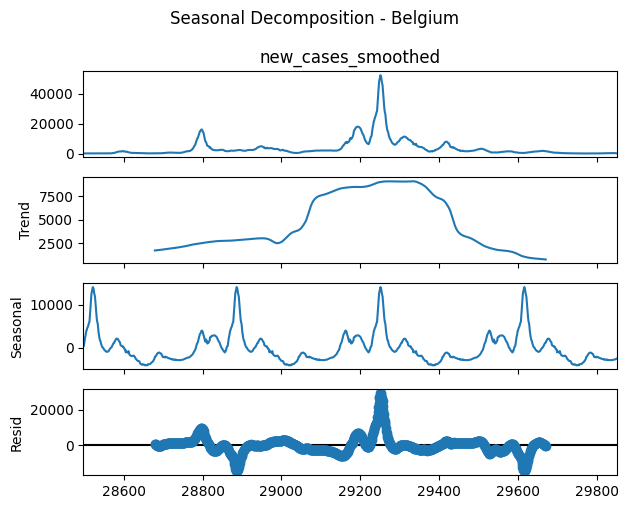

<Figure size 1000x600 with 0 Axes>

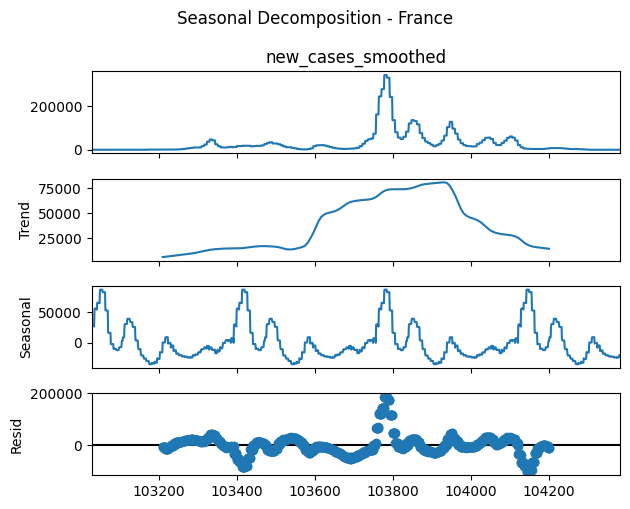

<Figure size 1000x600 with 0 Axes>

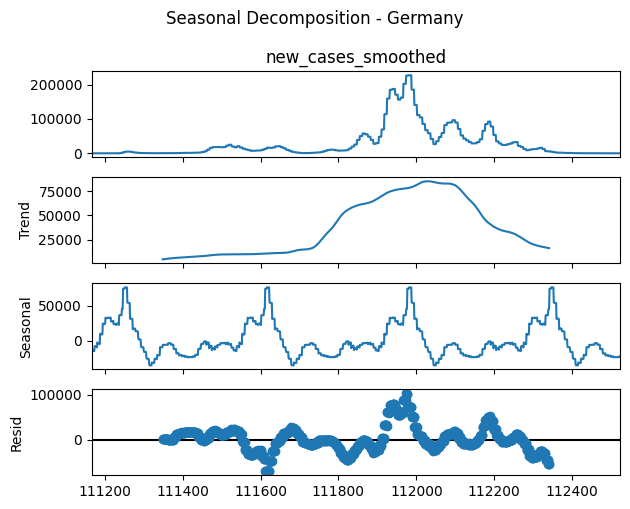

<Figure size 1000x600 with 0 Axes>

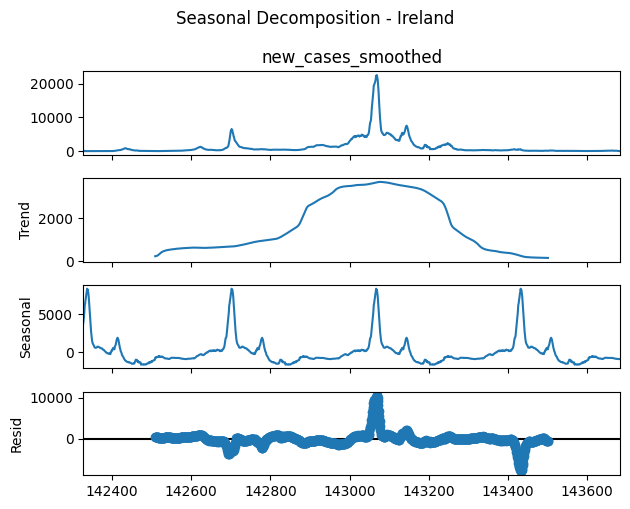

<Figure size 1000x600 with 0 Axes>

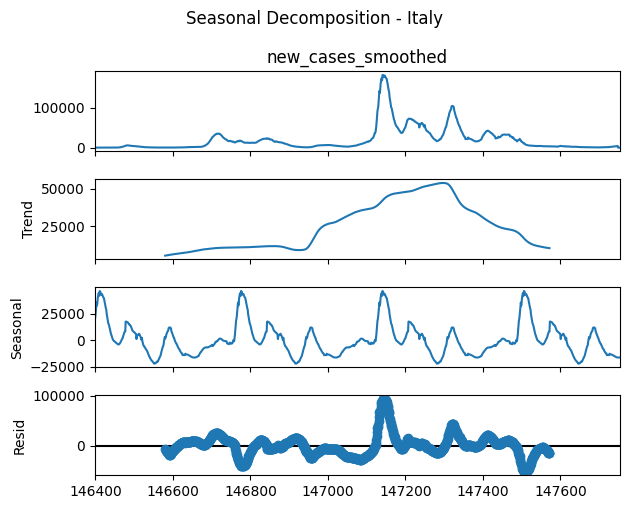

<Figure size 1000x600 with 0 Axes>

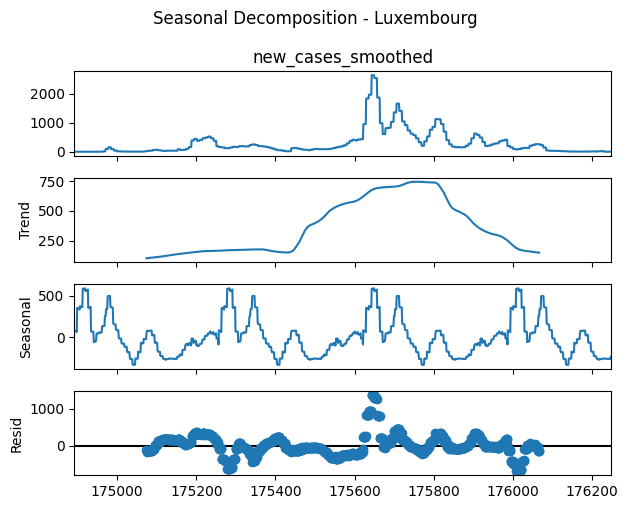

<Figure size 1000x600 with 0 Axes>

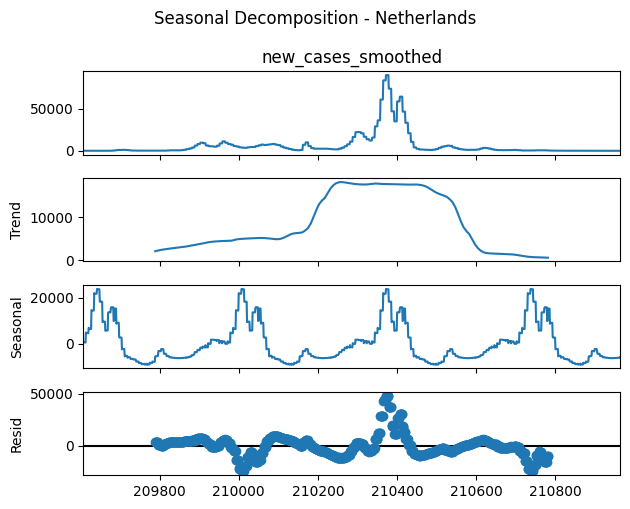

<Figure size 1000x600 with 0 Axes>

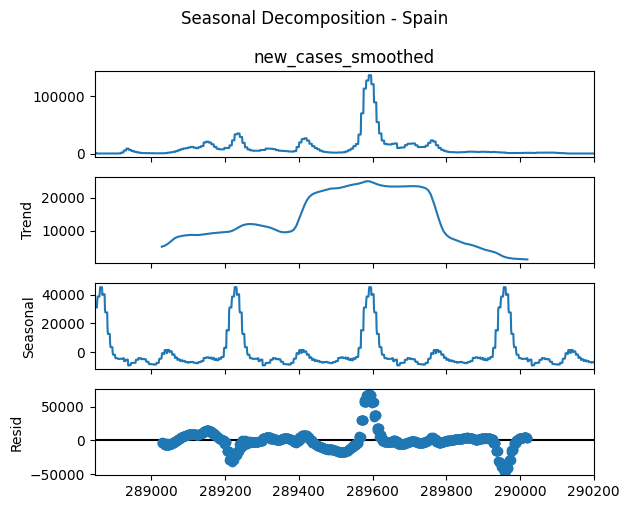

<Figure size 1000x600 with 0 Axes>

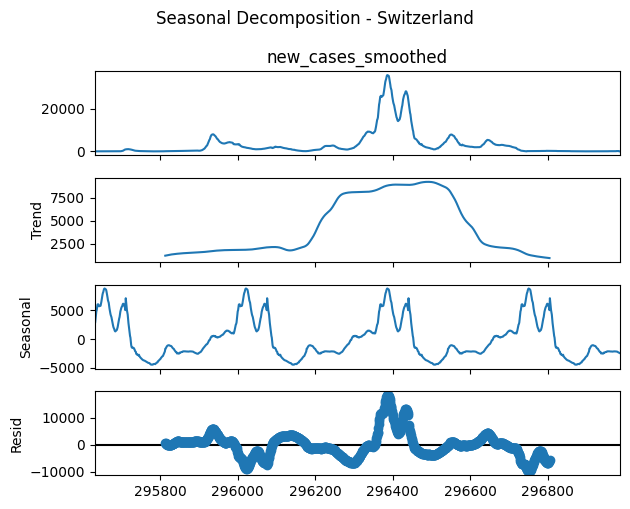

<Figure size 1000x600 with 0 Axes>

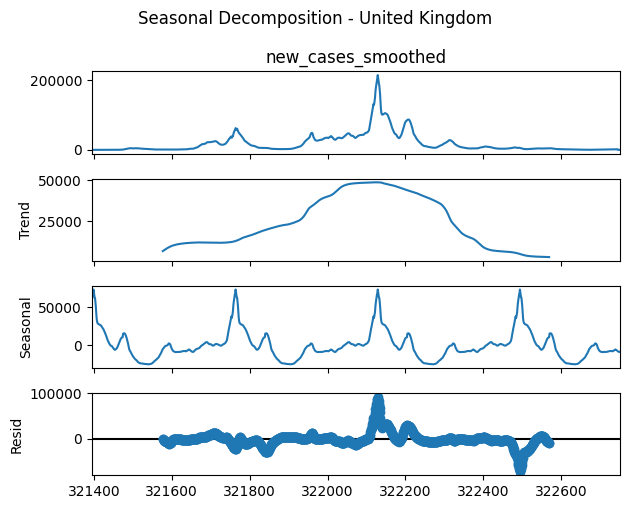

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


for country in data_clean_imputed['location'].unique():
    country_data = data_clean_imputed[data_clean_imputed['location'] == country]
    result = seasonal_decompose(country_data['new_cases_smoothed'], period=365)
    
    plt.figure(figsize=(10, 6))
    
    # Create plots
    result.plot()
    
    # Set the title with a higher y value to shift it up
    plt.suptitle(f'Seasonal Decomposition - {country}', y=1.05)
    
    # Save the figure with a lowercase country name
    plt.savefig('acf_plot_' + country.lower() + '.png')
    
    # Display the figure
    plt.show()



In [21]:
plt.savefig('autocorrelation_plot.png')

<Figure size 640x480 with 0 Axes>

## Time Series Data Stationary

In [22]:
from statsmodels.tsa.stattools import adfuller

for country in data_clean_imputed['location'].unique():
    country_data = data_clean_imputed[data_clean_imputed['location'] == country]
    result = adfuller(country_data['new_cases_smoothed'].values)
    
    print(f'Results for {country}:')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('---------------------------------------------')


Results for Belgium:
ADF Statistic: -3.185319
p-value: 0.020850
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for France:
ADF Statistic: -3.935136
p-value: 0.001791
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Germany:
ADF Statistic: -2.158400
p-value: 0.221689
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Ireland:
ADF Statistic: -3.227898
p-value: 0.018426
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Italy:
ADF Statistic: -3.244839
p-value: 0.017532
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Luxembourg:
ADF Statistic: -3.176894
p-value: 0.021362
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------
Results for Neth

## Feature Creation

### Auto Correlation

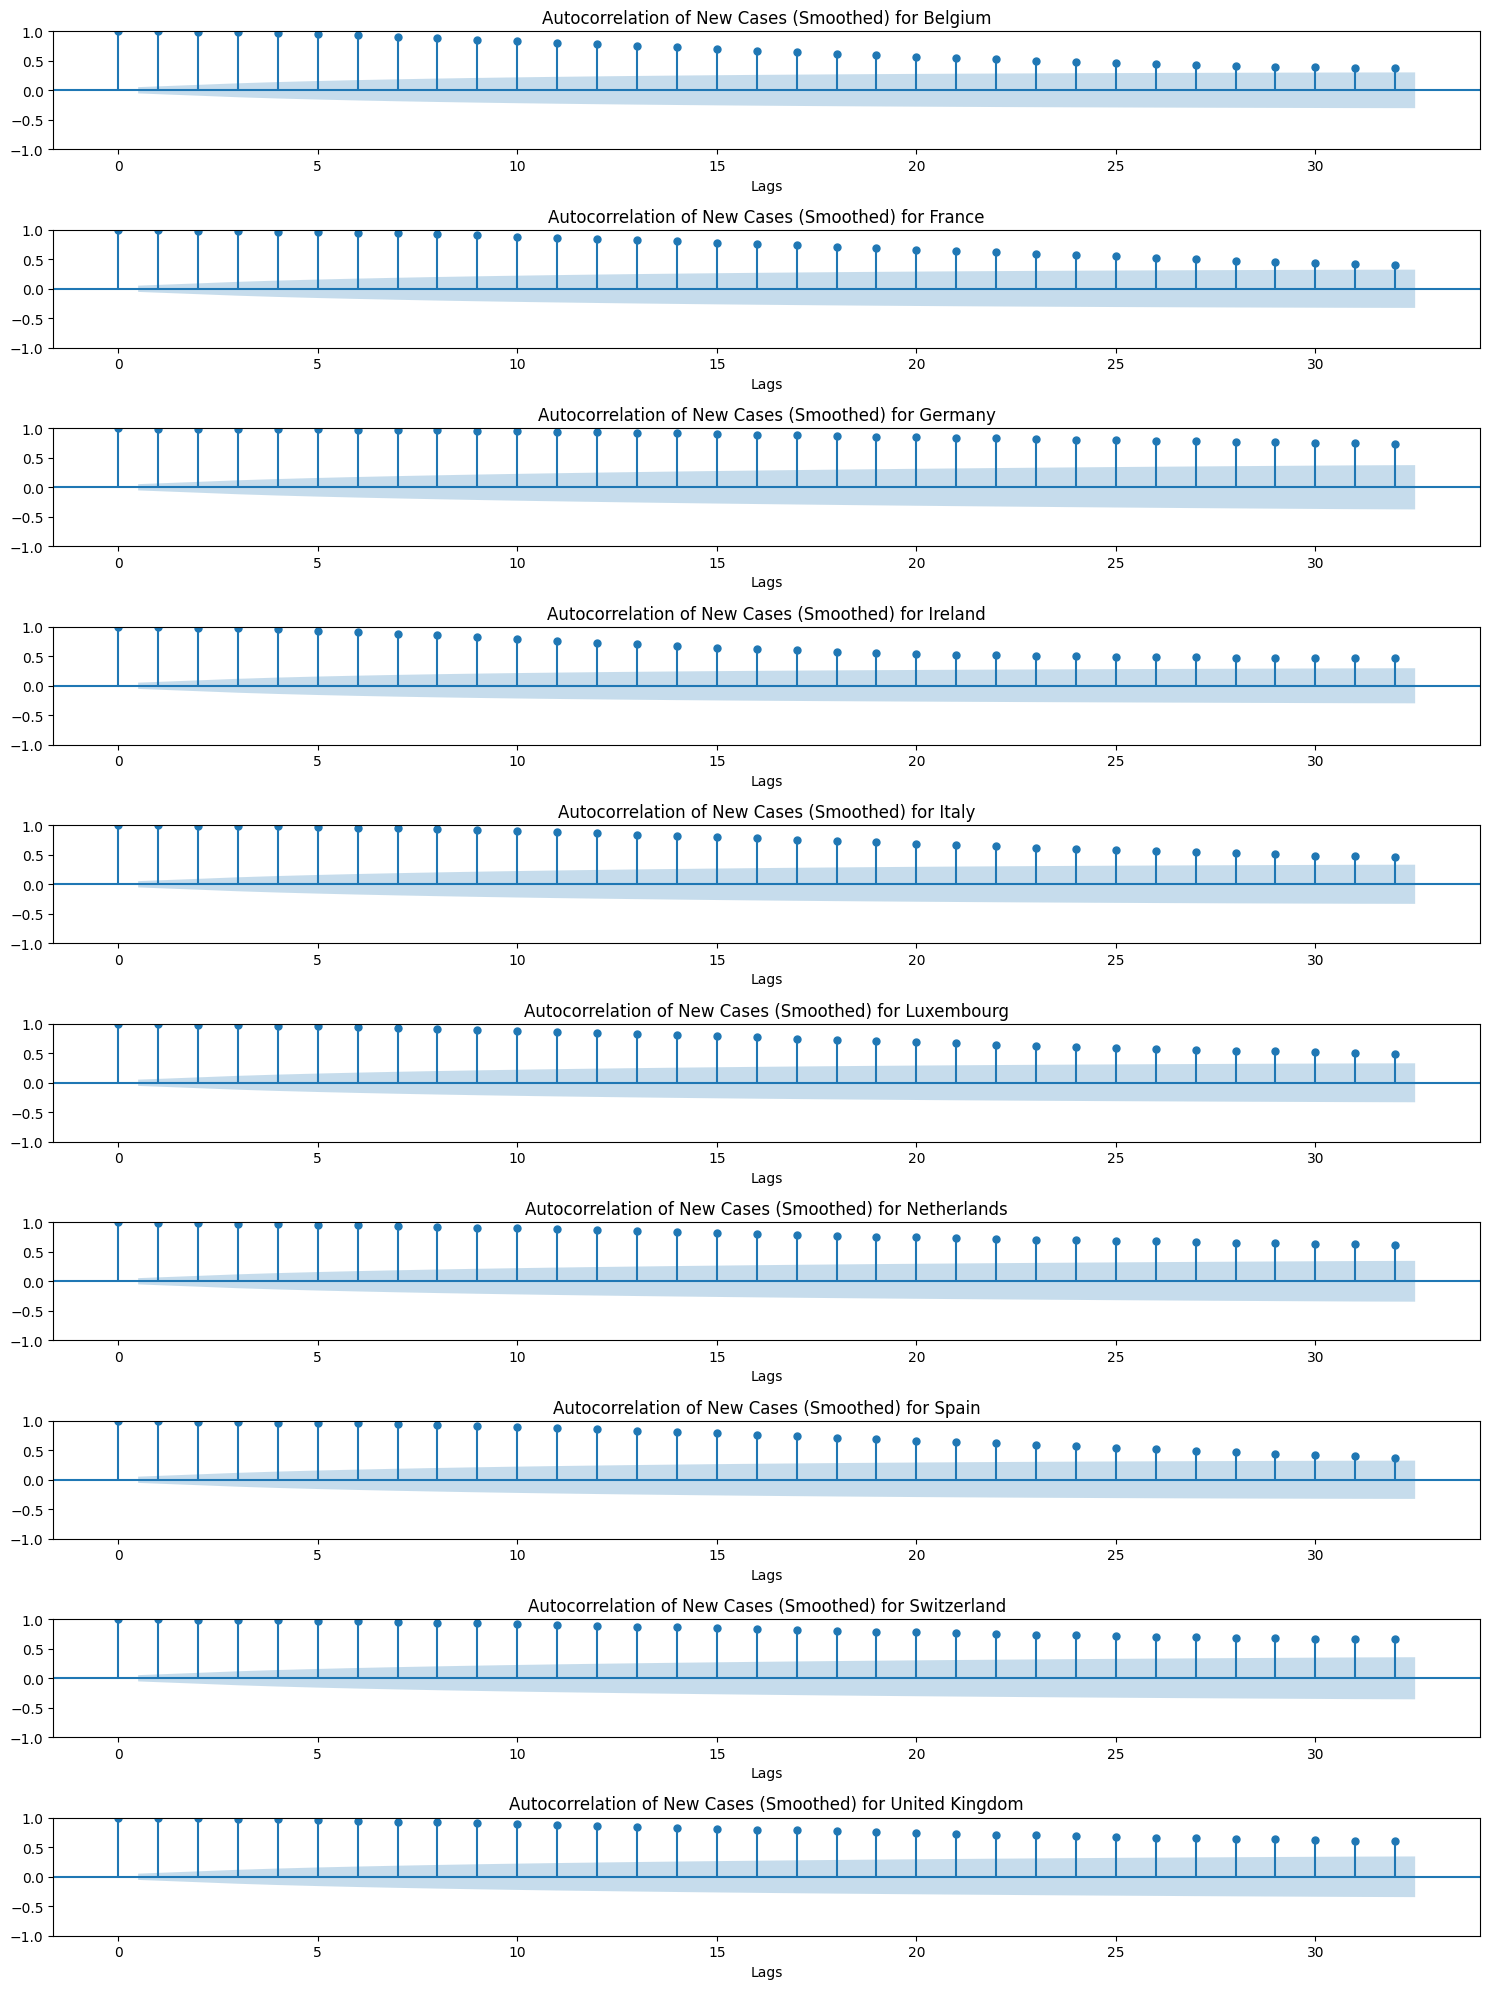

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

countries = data_clean_imputed['location'].unique()

plt.figure(figsize=(15, 20))

for i, country in enumerate(countries, 1):
    plt.subplot(len(countries), 1, i)
    country_data = data_clean_imputed[data_clean_imputed['location'] == country]['new_cases_smoothed']
    plot_acf(country_data.dropna(), alpha=0.05, ax=plt.gca())
    plt.title(f'Autocorrelation of New Cases (Smoothed) for {country}')
    plt.xlabel('Lags')

plt.tight_layout()
plt.show()

### Rolling and Lag Features

In [24]:
# lagged features with new_cases
for lag in [1, 7, 14]:
    data_clean_imputed[f'new_cases_lag{lag}'] = data_clean_imputed['new_cases_smoothed'].shift(lag)

In [25]:
# rolling window 7-day and 14-day for new_cases
for window in [7, 14]:
    data_clean_imputed[f'new_cases_roll_mean{window}'] = data_clean_imputed['new_cases_smoothed'].rolling(window=window).mean()
    data_clean_imputed[f'new_cases_roll_std{window}'] = data_clean_imputed['new_cases_smoothed'].rolling(window=window).std()

In [26]:
data_clean_imputed.head(10)

,iso_code,continent,location,date,new_cases_smoothed,new_deaths_smoothed,reproduction_rate,icu_patients,weekly_hosp_admissions,new_vaccinations_smoothed,...,population_density,gdp_per_capita,extreme_poverty,new_cases_lag1,new_cases_lag7,new_cases_lag14,new_cases_roll_mean7,new_cases_roll_std7,new_cases_roll_mean14,new_cases_roll_std14
28497,BEL,Europe,Belgium,2020-01-03,45.3714,-1.421085e-14,0.988,4.0,116.2,84.6,...,375.564,42658.576,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28498,BEL,Europe,Belgium,2020-01-04,45.3714,-1.421085e-14,0.988,4.0,116.2,84.6,...,375.564,42658.576,0.2,45.3714,NaN,NaN,NaN,NaN,NaN,NaN
28499,BEL,Europe,Belgium,2020-01-05,45.3714,-1.421085e-14,0.988,4.0,116.2,84.6,...,375.564,42658.576,0.2,45.3714,NaN,NaN,NaN,NaN,NaN,NaN
28500,BEL,Europe,Belgium,2020-01-06,45.3714,-1.421085e-14,0.988,4.0,116.2,84.6,...,375.564,42658.576,0.2,45.3714,NaN,NaN,NaN,NaN,NaN,NaN
28501,BEL,Europe,Belgium,2020-01-07,45.3714,-1.421085e-14,0.988,4.0,116.2,84.6,...,375.564,42658.576,0.2,45.3714,NaN,NaN,NaN,NaN,NaN,NaN
28502,BEL,Europe,Belgium,2020-01-08,0.0000,0.000000e+00,1.158,5.6,121.2,11.6,...,375.564,42658.576,0.2,45.3714,NaN,NaN,NaN,NaN,NaN,NaN
28503,BEL,Europe,Belgium,2020-01-09,0.0000,0.000000e+00,1.158,5.6,121.2,11.6,...,375.564,42658.576,0.2,0.0000,NaN,NaN,32.408143,22.138976,NaN,NaN
28504,BEL,Europe,Belgium,2020-01-10,0.0000,0.000000e+00,1.158,5.6,121.2,11.6,...,375.564,42658.576,0.2,0.0000,45.3714,NaN,25.926514,24.252033,NaN,NaN
28505,BEL,Europe,Belgium,2020-01-11,0.0000,0.000000e+00,1.158,5.6,121.2,11.6,...,375.564,42658.576,0.2,0.0000,45.3714,NaN,19.444886,24.252033,NaN,NaN
28506,BEL,Europe,Belgium,2020-01-12,0.0000,0.000000e+00,1.158,5.6,121.2,11.6,...,375.564,42658.576,0.2,0.0000,45.3714,NaN,12.963257,22.138976,NaN,NaN


### Additional Features 

In [27]:
# Data time features
data_clean_imputed['day_of_week'] = data_clean_imputed.index.dayofweek
# 0 refers to Monday and 6 to Sunday, we want to tell if the date is weekend or not
data_clean_imputed['weekend'] = np.where(data_clean_imputed['day_of_week'].isin([5, 6]), 1, 0)
data_clean_imputed['month'] = data_clean_imputed.index.month
data_clean_imputed['year'] = data_clean_imputed.index.year
data_clean_imputed.head(2)

AttributeError: 'Index' object has no attribute 'dayofweek'

In [ ]:
data_clean_imputed['date'] = data_clean_imputed.index
data_clean_imputed['season'] = data_clean_imputed['date'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or 
                                      x.month == 2 else 'Spring' if  x.month == 3 or 
                                      x.month == 4 or x.month == 5 else 'Summer' if  
                                      x.month == 6 or x.month == 7 or 
                                      x.month == 8 else 'Autumn' if  
                                      x.month == 9 or x.month == 10 or x.month == 11 else '')

In [ ]:
pip install holidays


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import holidays
import datetime
data_clean_imputed['holidays'] = data_clean_imputed['date'].apply( lambda x: 'Holiday' if x in holidays.US() 
                                      else 'Holiday' if x + datetime.timedelta(days=1) in holidays.US() else 'Normal day' )

In [ ]:
adjacent_countries = {
    'Spain': ['France'],
    'France': ['Spain', 'Belgium', 'Germany', 'Italy', 'Switzerland', 'Luxembourg'],
    'Germany': ['France', 'Belgium', 'Netherlands', 'Switzerland', 'Luxembourg'],
    'Ireland': ['United Kingdom'],
    'United Kingdom': ['Ireland'],
    'Italy': ['France', 'Switzerland'],
    'Belgium': ['France', 'Germany', 'Netherlands', 'Luxembourg'],
    'Netherlands': ['Germany', 'Belgium'],
    'Switzerland': ['France', 'Germany', 'Italy'],
    'Luxembourg': ['France', 'Germany', 'Belgium']
}

data_clean_imputed['adjacent_new_cases'] = 0

for country in adjacent_countries:
    if country in data_clean_imputed['location'].unique():
        adjacent_data = data_clean_imputed[data_clean_imputed['location'].isin(adjacent_countries[country])]
        daily_sum = adjacent_data.groupby('date')['new_cases'].sum()
        country_data = data_clean_imputed[data_clean_imputed['location'] == country]
        country_data = pd.merge(country_data, daily_sum, how='left', left_index=True, right_index=True, suffixes=('', '_adjacent'))
        if country in adjacent_countries[country]:
            country_data['new_cases_adjacent'] -= country_data['new_cases']
        
data_clean_imputed.loc[data_clean_imputed['location'] == country, 'adjacent_new_cases'] = country_data['new_cases_adjacent'].fillna(0)

data_clean_imputed[['location', 'new_cases', 'adjacent_new_cases']]


ValueError: 'date' is both an index level and a column label, which is ambiguous.

## Test Train Split

In [ ]:
# test train split
train_size = 0.8  
split_idx = int(len(data_clean_imputed) * train_size)
train = data_clean_imputed.iloc[:split_idx]
test = data_clean_imputed.iloc[split_idx:]

print('Train set shape:', train.shape)
print('Test set shape:', test.shape)


Train set shape: (10856, 27)
Test set shape: (2714, 27)


## EDA

### Univariate Analysis

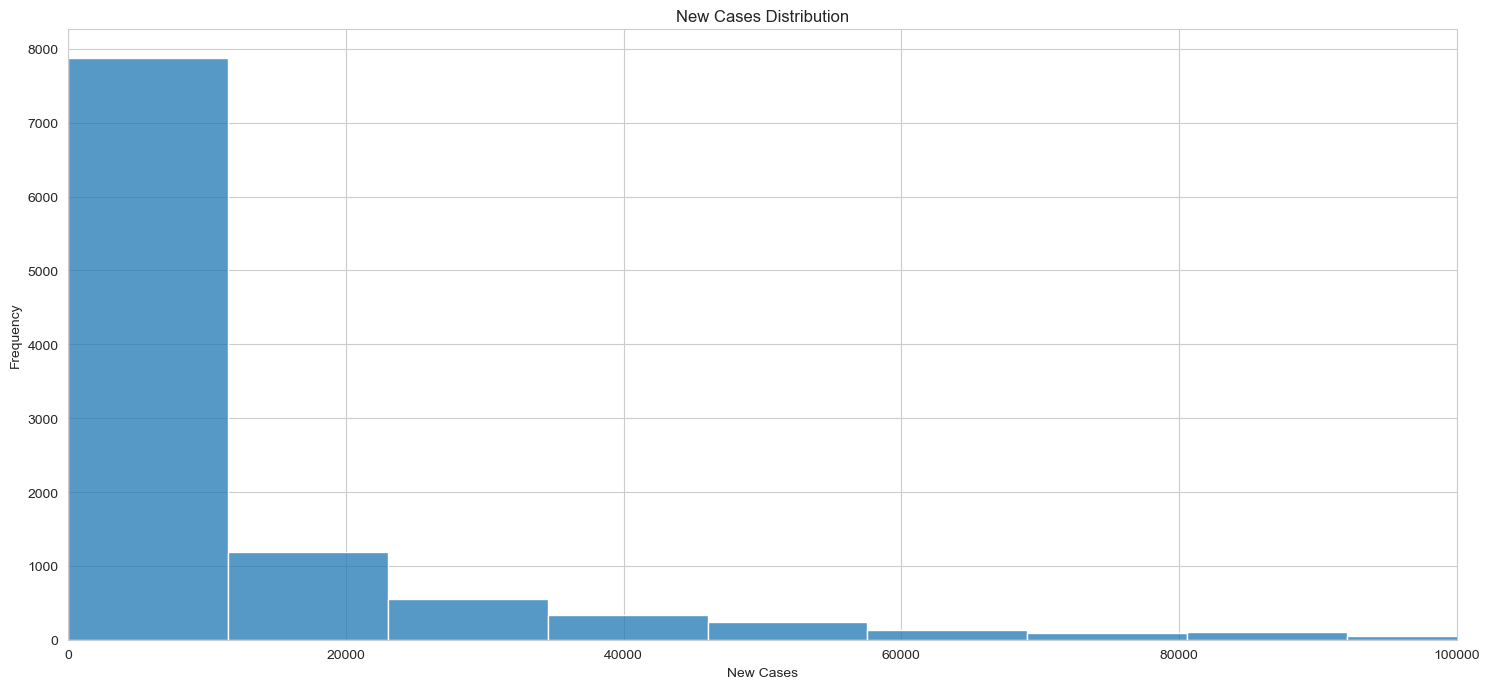

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))

sns.histplot(train['new_cases_smoothed'], kde=False, bins=30)
plt.title('New Cases Distribution')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.xlim(0, 100000)

plt.tight_layout()
plt.show()


### Bivariate Analysis

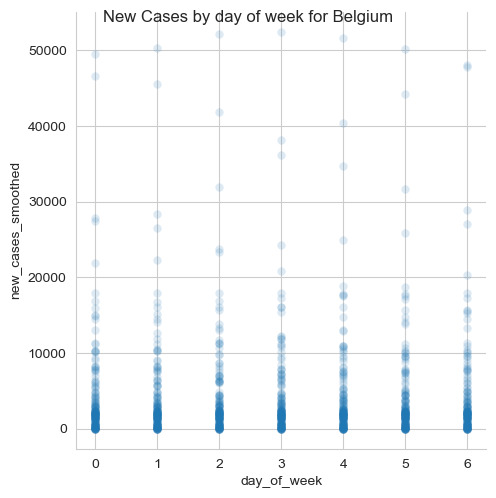

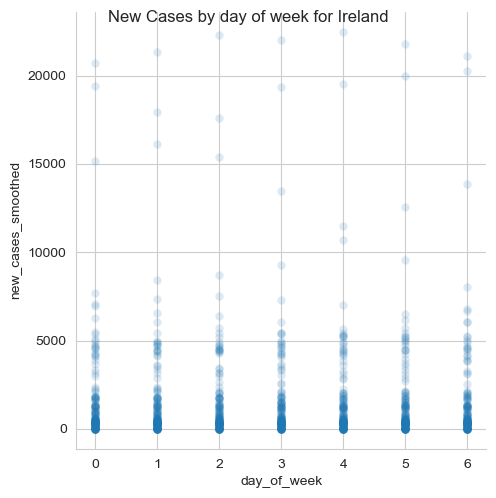

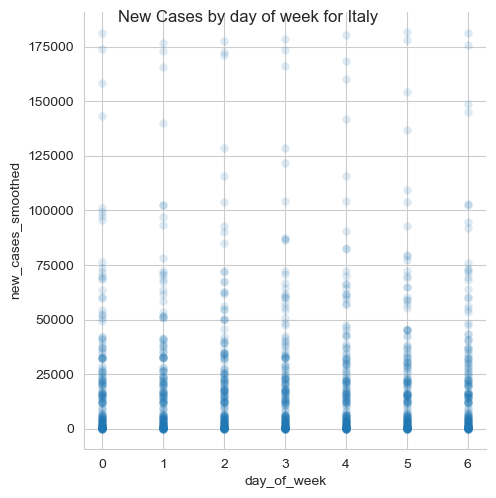

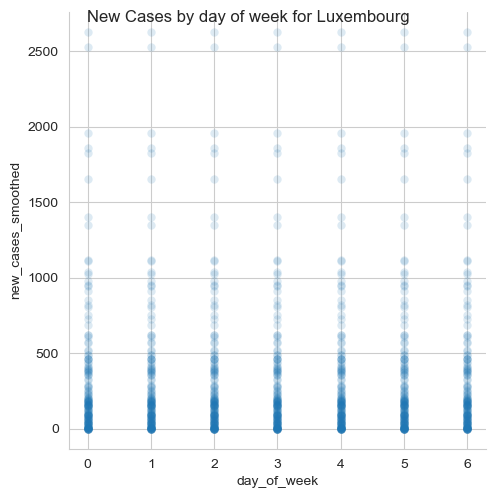

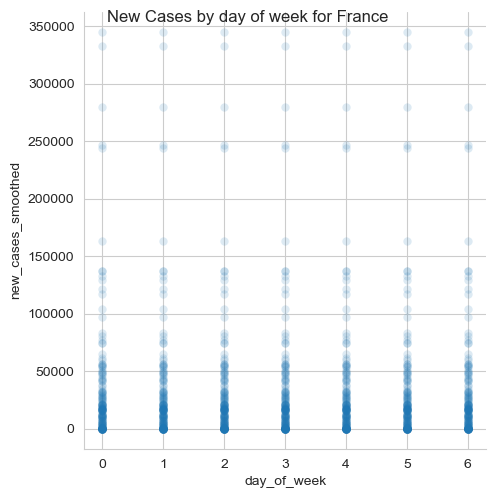

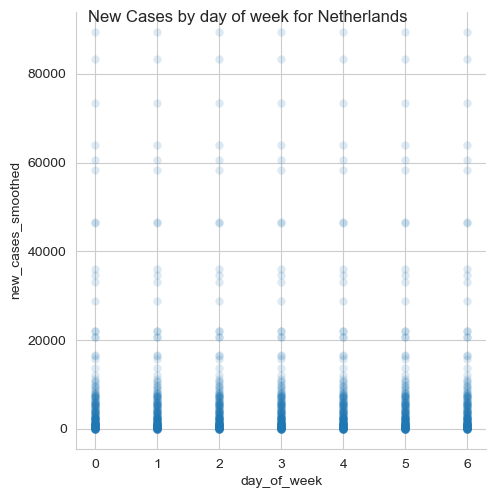

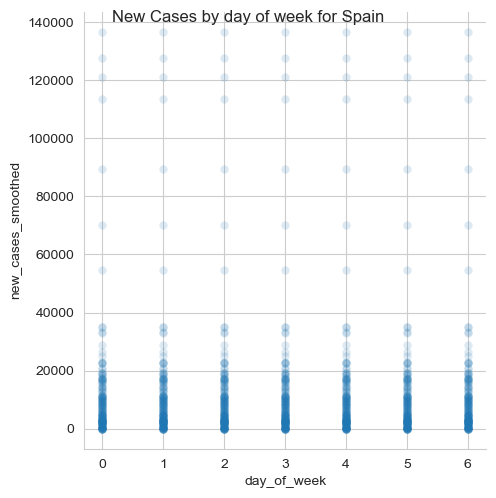

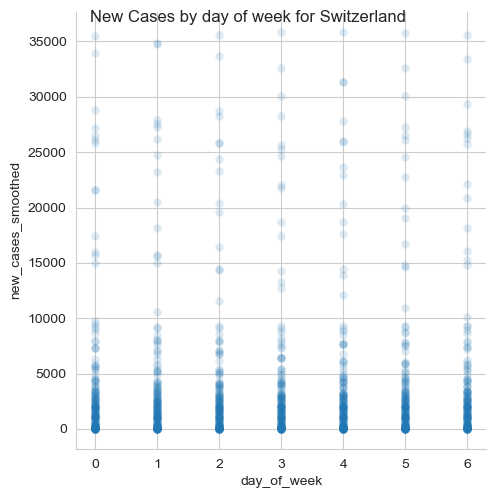

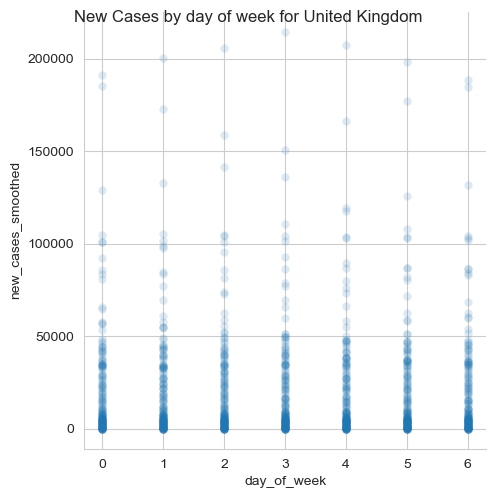

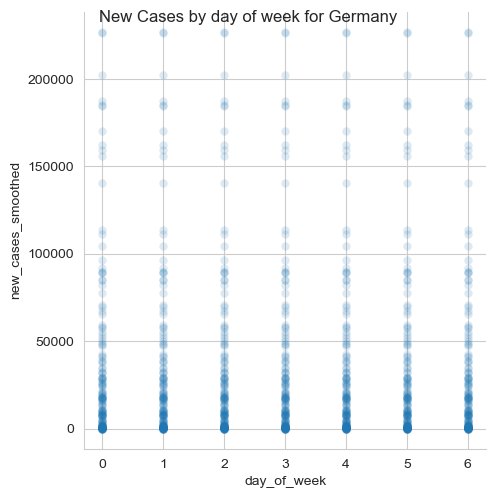

In [ ]:
for country in countries:
    country_data = train[train['location'] == country]

    sns.pairplot(country_data,
                 x_vars=['day_of_week'],
                 y_vars='new_cases_smoothed',
                 height=5,
                 plot_kws={'alpha': 0.15, 'linewidth': 0})
    
    plt.suptitle(f'New Cases by day of week for {country}')
    plt.show()


### Multivariate Analysis

/var/folders/n4/3g40sf9n163fj3t1fbrvlns40000gn/T/ipykernel_3314/2861495228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr( method='pearson' )


<Axes: >

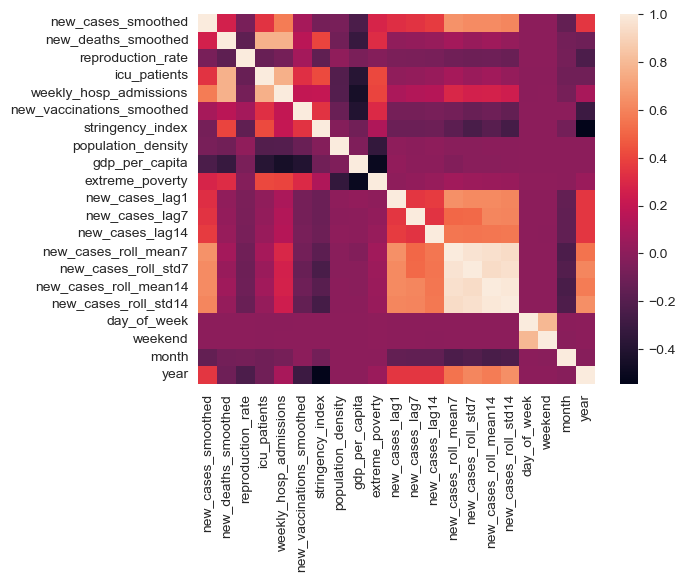

In [ ]:
correlation = train.corr( method='pearson' )
sns.heatmap( correlation )